In [1]:
import pandas as pd
from tensorflow.keras import layers
from libs.simple_processing import separate_target

DATA = pd.read_csv('nand.csv', delimiter=';')

X, y = separate_target(DATA, 'y')

print(X)
print(y)


     x1  x2
0     0   0
1     0   1
2     1   0
3     1   1
4     0   0
..   ..  ..
299   1   1
300   0   0
301   0   1
302   1   0
303   1   1

[304 rows x 2 columns]
0      1
1      1
2      1
3      0
4      1
      ..
299    0
300    1
301    1
302    1
303    0
Name: y, Length: 304, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# patience below 7 cuts to early
early_stopping = EarlyStopping(
    min_delta=0.0005,  # minimium amount of change to count as an improvement
    patience=7,  # how many epochs to wait before stopping
    restore_best_weights=True,
)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=40)

input_shape = [X_train.shape[1]]
print(input_shape)
print(X_train.shape)

[2]
(182, 2)


initial weights:  [[-0.32598412  0.5652396   0.3203351  -0.85440487  0.49795622 -0.18939781]
 [-0.35917443  0.8524621   0.79345983  0.0973987  -0.5808208  -0.63313884]]
initial biases:  [0. 0. 0. 0. 0. 0.]
Epoch 1/250


2022-09-18 16:39:42.778338: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-09-18 16:39:42.778353: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-09-18 16:39:42.778485: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.


1/2 [==============>...............] - ETA: 0s - loss: 0.4401 - accuracy: 0.4844

2022-09-18 16:39:43.026651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-18 16:39:43.214088: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-09-18 16:39:43.214100: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.


2/2 [==============================] - 1s 322ms/step - loss: 0.4221 - accuracy: 0.4780 - val_loss: 0.3644 - val_accuracy: 0.5328
Epoch 2/250
2/2 [==============================] - 0s 29ms/step - loss: 0.3939 - accuracy: 0.4780 - val_loss: 0.3461 - val_accuracy: 0.5328
Epoch 3/250
1/2 [==============>...............] - ETA: 0s - loss: 0.3780 - accuracy: 0.4766

2022-09-18 16:39:43.418993: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-18 16:39:43.419408: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.
2022-09-18 16:39:43.420023: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/1663511982.7780328/train/plugins/profile/2022_09_18_16_39_43

2022-09-18 16:39:43.420321: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/1663511982.7780328/train/plugins/profile/2022_09_18_16_39_43/MACBOOK-PRO-KKEPINS-MACWRO-2.trace.json.gz
2022-09-18 16:39:43.420806: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/1663511982.7780328/train/plugins/profile/2022_09_18_16_39_43

2022-09-18 16:39:43.420928: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/1663511982.7780328/train/plugins/p

2/2 [==============================] - 0s 28ms/step - loss: 0.3751 - accuracy: 0.4780 - val_loss: 0.3319 - val_accuracy: 0.5328
Epoch 4/250
2/2 [==============================] - 0s 29ms/step - loss: 0.3603 - accuracy: 0.4780 - val_loss: 0.3201 - val_accuracy: 0.5328
Epoch 5/250
2/2 [==============================] - 0s 28ms/step - loss: 0.3477 - accuracy: 0.4780 - val_loss: 0.3093 - val_accuracy: 0.5328
Epoch 6/250
2/2 [==============================] - 0s 26ms/step - loss: 0.3361 - accuracy: 0.4780 - val_loss: 0.2994 - val_accuracy: 0.5328
Epoch 7/250
2/2 [==============================] - 0s 24ms/step - loss: 0.3254 - accuracy: 0.4780 - val_loss: 0.2899 - val_accuracy: 0.5328
Epoch 8/250
2/2 [==============================] - 0s 22ms/step - loss: 0.3153 - accuracy: 0.4780 - val_loss: 0.2814 - val_accuracy: 0.5328
Epoch 9/250
2/2 [==============================] - 0s 22ms/step - loss: 0.3060 - accuracy: 0.4780 - val_loss: 0.2728 - val_accuracy: 0.5328
Epoch 10/250
2/2 [==============

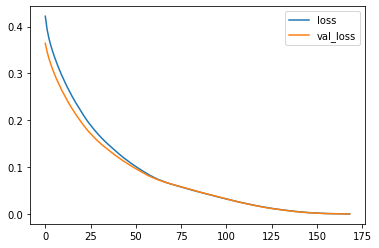

In [33]:
from tensorflow import keras
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

# initially I got val loss 0.07 because Id column present. After removing it I got 0.13
# Then I experimented with optimizers, loss and activation functions and the number of layers and neurons and finally got it back to 0.0700

activation_function = 'relu'

model = keras.Sequential([
    layers.Dense(2, activation=activation_function, input_shape=input_shape),
    layers.Dense(6, activation=activation_function),
    layers.Dense(1)
])

tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

model.compile(
    # optimizer='adam',
    #  loss='mae',
    loss='mean_squared_error',
    # metrics=['categorical_accuracy']
    # metrics=['sparse_categorical_accuracy']
    metrics=['accuracy']
)

weights = model.layers[1].get_weights()[0]
biases = model.layers[1].get_weights()[1]
print("initial weights: ", weights)
print("initial biases: ", biases)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=250,
    callbacks=[early_stopping, tensorboard]
)
# print(model.summary())
weights = model.layers[1].get_weights()[0]
biases = model.layers[1].get_weights()[1]

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

print("learned weights: ", weights)
# Biases are similar because they are all initialized with zeros (by default).
print("learned biases: ", biases)

In [28]:
#tensorboard --logdir=logs/

SyntaxError: cannot assign to operator (4260783031.py, line 1)

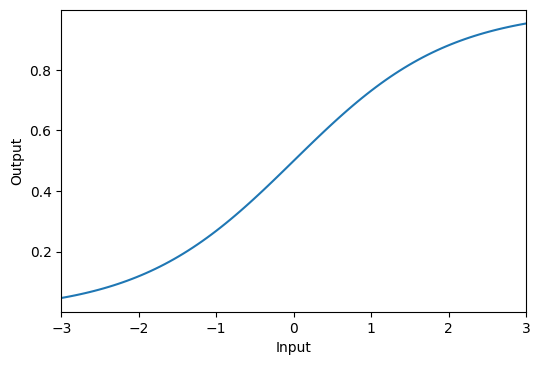

In [26]:
# Change 'relu' to 'elu', 'selu', 'swish'... or something else
# How different activation functions look like

import tensorflow as tf
import matplotlib.pyplot as plt

# print(tf.__version__)

activation_layer = layers.Activation('sigmoid')

ax = tf.linspace(-3.0, 3.0, 100)
ay = activation_layer(ax)  # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(ax, ay)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [23]:
layer_outputs = tf.keras.Model(model.input, model.layers[2].output)
weights = model.layers[2].get_weights()
# layer_outputs.summary() # (None, 22, 22, 256)
# print(model.layers[1].output)
print(weights)
# mid_layer_outputs = tf.keras.Model(seq_model.input, seq_model.layers[2].output)
# mid_layer_outputs.summary() # (None, 26, 26, 64)

[array([[-0.34849173],
       [ 0.8378321 ],
       [ 0.57582414],
       [-1.1413615 ],
       [ 0.5586264 ],
       [-0.20247483]], dtype=float32), array([0.05442958], dtype=float32)]
